<a href="https://colab.research.google.com/github/PabloLBandeira/biblioteca-Pandas/blob/main/Desafio_5_Pablo_Bandeira.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**`Atualizações, importações de bibliotecas e data set, preparação do ambiente`**

In [1]:
!pip install --upgrade gspread pandas oauth2client

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 27.7 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.0.3
    Uninstalling pandas-2.0.3:
      Successfully uninstalled pandas-2.0.3
  Attempting uninstall: gspread
    Found existing installation: gspread 6.0.2
    Uninstalling gspread-6.0.2:
      Successfully uninstalled gspread-6.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pandas<2.2.2dev0,>=2.0, but you have pandas 2.2.2 which is incompatible.
google-colab 1.0.0 requires pandas==2.0.3, but you have pandas 2.2.2 which is incompatible.


In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px

from sklearn import datasets
from sklearn.preprocessing import scale, minmax_scale, power_transform

from IPython.core.display import HTML
from ipywidgets import interact, widgets

In [3]:
import gspread
from google.auth import default
from google.colab import auth

In [4]:
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

In [5]:
spreadsheet_id = '1xZ7RhBKljOF6Pbq82PE-Xqb44Rwxb0cQGhHCdFY1Ras'
sheet_name = 'data (2).csv'
spreadsheet = gc.open_by_key(spreadsheet_id)
worksheet = spreadsheet.worksheet(sheet_name)
data = worksheet.get_all_values()
headers = data.pop(0)
df = pd.DataFrame(data, columns=headers)


`Leitura e identificação do data set `


In [6]:
print(df.head())

  InvoiceNo StockCode                          Description Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER        6   
1    536365     71053                  WHITE METAL LANTERN        6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER        8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE        6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.        6   

       InvoiceDate UnitPrice CustomerID         Country  
0  12/1/2010 08:26      2.55      17850  United Kingdom  
1  12/1/2010 08:26      3.39      17850  United Kingdom  
2  12/1/2010 08:26      2.75      17850  United Kingdom  
3  12/1/2010 08:26      3.39      17850  United Kingdom  
4  12/1/2010 08:26      3.39      17850  United Kingdom  


In [7]:
print(df.shape)

(541909, 8)


In [8]:
print(df.dtypes)

InvoiceNo      object
StockCode      object
Description    object
Quantity       object
InvoiceDate    object
UnitPrice      object
CustomerID     object
Country        object
dtype: object


In [9]:
print(df.head().to_string())

  InvoiceNo StockCode                          Description Quantity      InvoiceDate UnitPrice CustomerID         Country
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER        6  12/1/2010 08:26      2.55      17850  United Kingdom
1    536365     71053                  WHITE METAL LANTERN        6  12/1/2010 08:26      3.39      17850  United Kingdom
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER        8  12/1/2010 08:26      2.75      17850  United Kingdom
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE        6  12/1/2010 08:26      3.39      17850  United Kingdom
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.        6  12/1/2010 08:26      3.39      17850  United Kingdom


In [10]:
print("Distribuição dos dados com describe():")
print(df.describe(include='all'))

Distribuição dos dados com describe():
       InvoiceNo StockCode                         Description Quantity  \
count     541909    541909                              541909   541909   
unique     25900      4070                                4212      722   
top       573585    85123A  WHITE HANGING HEART T-LIGHT HOLDER        1   
freq        1114      2313                                2369   148227   

             InvoiceDate UnitPrice CustomerID         Country  
count             541909    541909     541909          541909  
unique             23260      1629       4373              38  
top     10/31/2011 14:41      1.25             United Kingdom  
freq                1114     50496     135080          495478  


In [11]:
print("\nTipos de dados de cada coluna:")
print(df.dtypes)


Tipos de dados de cada coluna:
InvoiceNo      object
StockCode      object
Description    object
Quantity       object
InvoiceDate    object
UnitPrice      object
CustomerID     object
Country        object
dtype: object


`identificação de nulos e filtro somente com valores válidos`

In [12]:
null = df.isna().sum()
print(null)


InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


In [13]:
invalid_prices = df[(df['UnitPrice'].isna()) | (df['UnitPrice'].astype(float) < 0)]
print("nulos ou < 0:")
print(invalid_prices)

nulos ou < 0:
       InvoiceNo StockCode      Description Quantity      InvoiceDate  \
299983   A563186         B  Adjust bad debt        1  8/12/2011 14:51   
299984   A563187         B  Adjust bad debt        1  8/12/2011 14:52   

        UnitPrice CustomerID         Country  
299983  -11062.06             United Kingdom  
299984  -11062.06             United Kingdom  


In [14]:
df = df[df['UnitPrice'].astype(float) > 0]
print(df.head().to_string())

  InvoiceNo StockCode                          Description Quantity      InvoiceDate UnitPrice CustomerID         Country
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER        6  12/1/2010 08:26      2.55      17850  United Kingdom
1    536365     71053                  WHITE METAL LANTERN        6  12/1/2010 08:26      3.39      17850  United Kingdom
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER        8  12/1/2010 08:26      2.75      17850  United Kingdom
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE        6  12/1/2010 08:26      3.39      17850  United Kingdom
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.        6  12/1/2010 08:26      3.39      17850  United Kingdom


In [15]:
invalid_quantity = df[(df['Quantity'].isna()) | (df['Quantity'].astype(float) < 0)]
print("nulos ou < 0:")
print(invalid_quantity)

nulos ou < 0:
       InvoiceNo StockCode                       Description Quantity  \
141      C536379         D                          Discount       -1   
154      C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS       -1   
235      C536391     22556     PLASTERS IN TIN CIRCUS PARADE      -12   
236      C536391     21984   PACK OF 12 PINK PAISLEY TISSUES      -24   
237      C536391     21983   PACK OF 12 BLUE PAISLEY TISSUES      -24   
...          ...       ...                               ...      ...   
540449   C581490     23144   ZINC T-LIGHT HOLDER STARS SMALL      -11   
541541   C581499         M                            Manual       -1   
541715   C581568     21258        VICTORIAN SEWING BOX LARGE       -5   
541716   C581569     84978  HANGING HEART JAR T-LIGHT HOLDER       -1   
541717   C581569     20979     36 PENCILS TUBE RED RETROSPOT       -5   

            InvoiceDate UnitPrice CustomerID         Country  
141     12/1/2010 09:41      27.5      14527  

In [16]:
df = df[df['Quantity'].astype(float) > 0]
print(df.head().to_string())

  InvoiceNo StockCode                          Description Quantity      InvoiceDate UnitPrice CustomerID         Country
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER        6  12/1/2010 08:26      2.55      17850  United Kingdom
1    536365     71053                  WHITE METAL LANTERN        6  12/1/2010 08:26      3.39      17850  United Kingdom
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER        8  12/1/2010 08:26      2.75      17850  United Kingdom
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE        6  12/1/2010 08:26      3.39      17850  United Kingdom
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.        6  12/1/2010 08:26      3.39      17850  United Kingdom


In [17]:
duplicated_rows = df[df.duplicated()]
print("Linhas duplicadas:")
print(duplicated_rows)

Linhas duplicadas:
       InvoiceNo StockCode                        Description Quantity  \
517       536409     21866        UNION JACK FLAG LUGGAGE TAG        1   
527       536409     22866      HAND WARMER SCOTTY DOG DESIGN        1   
537       536409     22900     SET 2 TEA TOWELS I LOVE LONDON        1   
539       536409     22111       SCOTTIE DOG HOT WATER BOTTLE        1   
555       536412     22327  ROUND SNACK BOXES SET OF 4 SKULLS        1   
...          ...       ...                                ...      ...   
541675    581538     22068        BLACK PIRATE TREASURE CHEST        1   
541689    581538     23318     BOX OF 6 MINI VINTAGE CRACKERS        1   
541692    581538     22992              REVOLVER WOODEN RULER        1   
541699    581538     22694                        WICKER STAR        1   
541701    581538     23343        JUMBO BAG VINTAGE CHRISTMAS        1   

            InvoiceDate UnitPrice CustomerID         Country  
517     12/1/2010 11:45      

In [18]:
df = df.drop_duplicates()

print("Após dropar as linhas duplicadas:")
print(df.head().to_string())

Após dropar as linhas duplicadas:
  InvoiceNo StockCode                          Description Quantity      InvoiceDate UnitPrice CustomerID         Country
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER        6  12/1/2010 08:26      2.55      17850  United Kingdom
1    536365     71053                  WHITE METAL LANTERN        6  12/1/2010 08:26      3.39      17850  United Kingdom
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER        8  12/1/2010 08:26      2.75      17850  United Kingdom
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE        6  12/1/2010 08:26      3.39      17850  United Kingdom
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.        6  12/1/2010 08:26      3.39      17850  United Kingdom


In [19]:
print(df['CustomerID'].unique())
print(df['CustomerID'].dtype)

['17850' '13047' '12583' ... '13298' '14569' '12713']
object


In [20]:
df['CustomerID'] = df['CustomerID'].replace('', np.nan).fillna('-1').astype(int)


In [32]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%m/%d/%Y %H:%M')

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


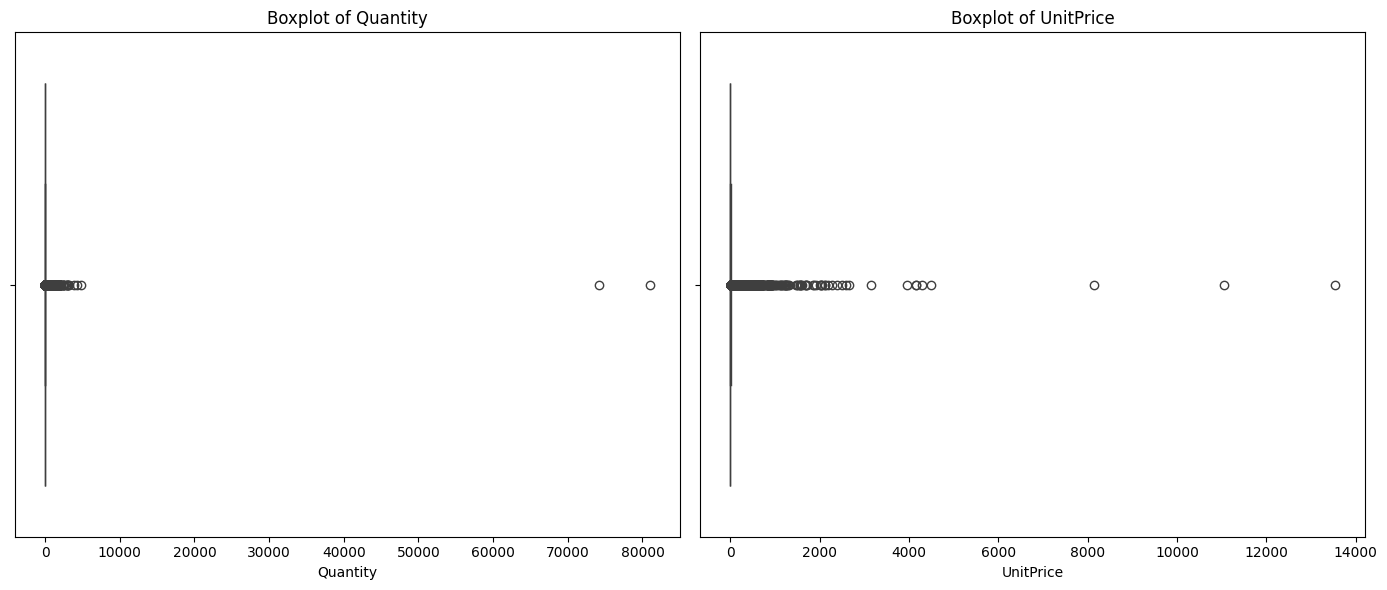

In [23]:
plt.figure(figsize=(14, 6))

# Quantity
plt.subplot(1, 2, 1)
sns.boxplot(x=df['Quantity'])
plt.title('Boxplot of Quantity')

# UnitPrice
plt.subplot(1, 2, 2)
sns.boxplot(x=df['UnitPrice'])
plt.title('Boxplot of UnitPrice')

plt.tight_layout()
plt.show()

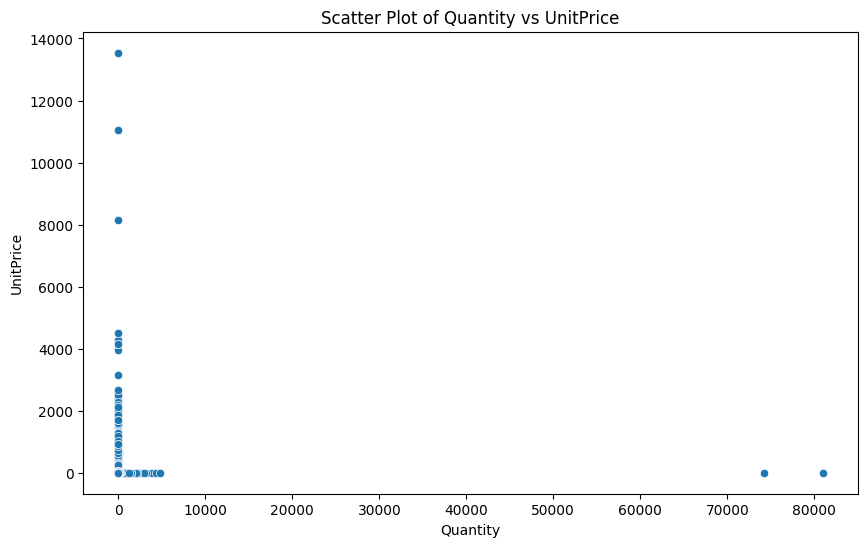

In [34]:
plt.figure(figsize=(10, 6))

sns.scatterplot(x='Quantity', y='UnitPrice', data=df)
plt.title('Scatter Plot of Quantity vs UnitPrice')
plt.xlabel('Quantity')
plt.ylabel('UnitPrice')

plt.show()

In [50]:
df_sem_outliers = df[df['Quantity'] <= 10000]

print(df_sem_outliers.describe())
print(df_sem_outliers.head().to_string())

            Quantity                    InvoiceDate      UnitPrice  \
count  524876.000000                         524876  524876.000000   
mean       10.320933  2011-07-04 15:30:17.879080192       3.922589   
min         1.000000            2010-12-01 08:26:00       0.040000   
25%         1.000000            2011-03-28 12:13:00       1.250000   
50%         4.000000            2011-07-20 11:22:00       2.080000   
75%        11.000000            2011-10-19 11:41:00       4.130000   
max      4800.000000            2011-12-09 12:50:00   13541.330000   
std        37.914165                            NaN      36.093095   

          CustomerID     TotalPrice  
count  524876.000000  524876.000000  
mean    11437.469050      19.807462  
min        -1.000000       0.060000  
25%        -1.000000       3.900000  
50%     14350.000000       9.920000  
75%     16245.000000      17.700000  
max     18287.000000   38970.000000  
std      6799.946587      91.720436  
  InvoiceNo StockCode      

In [51]:
df_sorted = df_sem_outliers.sort_values(by='Quantity', ascending=False)
print(df_sorted)

       InvoiceNo StockCode                          Description  Quantity  \
421632    573008     84077    WORLD WAR 2 GLIDERS ASSTD DESIGNS      4800   
206121    554868     22197                 SMALL POPCORN HOLDER      4300   
97432     544612     22053                EMPIRE DESIGN ROSETTE      3906   
270885    560599     18007  ESSENTIAL BALM 3.5g TIN IN ENVELOPE      3186   
52711     540815     21108   FAIRY CAKE FLANNEL ASSORTED COLOUR      3114   
...          ...       ...                                  ...       ...   
360427    568227     20963                    APPLE BATH SPONGE         1   
360429    568227    84519A      TOMATO CHARLIE+LOLA COASTER SET         1   
360430    568227     22196         SMALL HEART MEASURING SPOONS         1   
360433    568227     21934                   SKULL SHOULDER BAG         1   
372249    569234     23287              RED VINTAGE SPOT BEAKER         1   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPri

In [52]:
df_sem_outliers = df_sem_outliers[df_sem_outliers['UnitPrice'] <= 5000]

print(df_sem_outliers.describe())
print(df_sem_outliers.head().to_string())

            Quantity                    InvoiceDate      UnitPrice  \
count  524873.000000                         524873  524873.000000   
mean       10.320986  2011-07-04 15:30:56.087967744       3.860223   
min         1.000000            2010-12-01 08:26:00       0.040000   
25%         1.000000            2011-03-28 12:13:00       1.250000   
50%         4.000000            2011-07-20 11:22:00       2.080000   
75%        11.000000            2011-10-19 11:41:00       4.130000   
max      4800.000000            2011-12-09 12:50:00    4505.170000   
std        37.914267                            NaN      24.379946   

          CustomerID     TotalPrice  
count  524873.000000  524873.000000  
mean    11437.503888      19.745187  
min        -1.000000       0.060000  
25%        -1.000000       3.900000  
50%     14350.000000       9.920000  
75%     16245.000000      17.700000  
max     18287.000000   38970.000000  
std      6799.926408      87.785701  
  InvoiceNo StockCode      

In [53]:
df_sorted2 = df_sem_outliers.sort_values(by='UnitPrice', ascending=False)
print(df_sorted2)

       InvoiceNo StockCode                 Description  Quantity  \
297723    562955       DOT              DOTCOM POSTAGE         1   
268028    560373         M                      Manual         1   
422351    573077         M                      Manual         1   
422376    573080         M                      Manual         1   
406406    571751         M                      Manual         1   
...          ...       ...                         ...       ...   
282095    561625     16045  POPART WOODEN PENCILS ASST       100   
523461    580513     16045  POPART WOODEN PENCILS ASST       100   
344823    567102     16045  POPART WOODEN PENCILS ASST       500   
263241    559979     16045  POPART WOODEN PENCILS ASST       100   
477440    577057     16045  POPART WOODEN PENCILS ASST       100   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
297723 2011-08-11 10:14:00    4505.17          -1  United Kingdom     4505.17   
268028 2011-07-18 12:

In [54]:
df_sem_outliers.head()
df_sorted = df.sort_values(by='Quantity', ascending=False)
print(df_sorted)


       InvoiceNo StockCode                        Description  Quantity  \
540421    581483     23843        PAPER CRAFT , LITTLE BIRDIE     80995   
61619     541431     23166     MEDIUM CERAMIC TOP STORAGE JAR     74215   
421632    573008     84077  WORLD WAR 2 GLIDERS ASSTD DESIGNS      4800   
206121    554868     22197               SMALL POPCORN HOLDER      4300   
97432     544612     22053              EMPIRE DESIGN ROSETTE      3906   
...          ...       ...                                ...       ...   
98927     544687     21360             JOY LARGE WOOD LETTERS         1   
360429    568227    84519A    TOMATO CHARLIE+LOLA COASTER SET         1   
360430    568227     22196       SMALL HEART MEASURING SPOONS         1   
360433    568227     21934                 SKULL SHOULDER BAG         1   
372250    569234     22721      SET OF 3 CAKE TINS SKETCHBOOK         1   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
540421 2011-12-09 

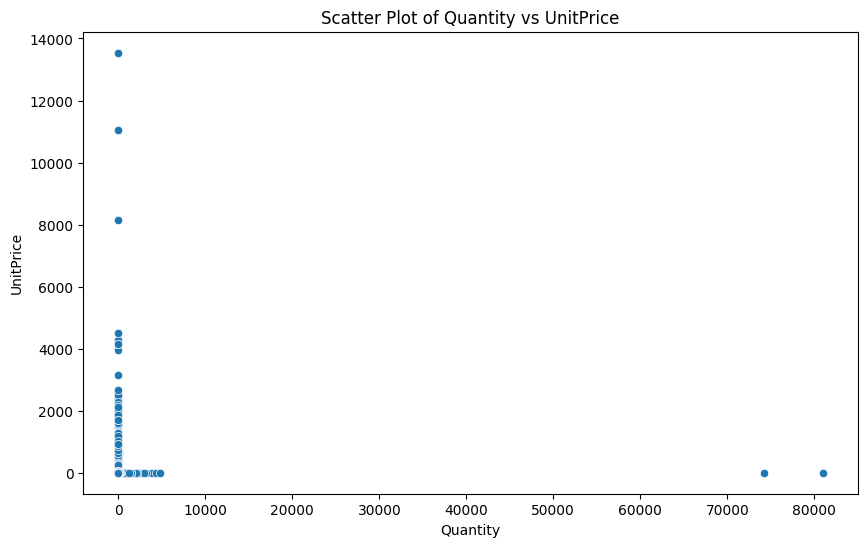

In [55]:
plt.figure(figsize=(10, 6))

sns.scatterplot(x='Quantity', y='UnitPrice', data=df)
plt.title('Scatter Plot of Quantity vs UnitPrice')
plt.xlabel('Quantity')
plt.ylabel('UnitPrice')

plt.show()

`Visualização gráfica das informações importantes`

In [56]:
df_sem_outliers['TotalPrice'] = df_sem_outliers['Quantity'].astype(float) * df_sem_outliers['UnitPrice'].astype(float)

print(df_sem_outliers.head().to_string())

  InvoiceNo StockCode                          Description  Quantity         InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice YearMonth
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6 2010-12-01 08:26:00       2.55       17850  United Kingdom       15.30   2010-12
1    536365     71053                  WHITE METAL LANTERN         6 2010-12-01 08:26:00       3.39       17850  United Kingdom       20.34   2010-12
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8 2010-12-01 08:26:00       2.75       17850  United Kingdom       22.00   2010-12
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6 2010-12-01 08:26:00       3.39       17850  United Kingdom       20.34   2010-12
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6 2010-12-01 08:26:00       3.39       17850  United Kingdom       20.34   2010-12


In [58]:
df['InvoiceNo'] = df['InvoiceNo'].astype(str)
df['StockCode'] = df['StockCode'].astype(str)
df['Description'] = df['Description'].astype(str)
df['Quantity'] = df['Quantity'].astype(int)
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['UnitPrice'] = df['UnitPrice'].astype(float)
df['CustomerID'] = df['CustomerID'].astype(int)
df['Country'] = df['Country'].astype(str)
df['TotalPrice'] = df['TotalPrice'].astype(float)
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')

print(df_sem_outliers.dtypes)

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID              int64
Country                object
TotalPrice            float64
YearMonth           period[M]
dtype: object


In [59]:
last_purchase = df_sem_outliers['InvoiceDate'].max()

# Exibir a data da última compra
print("Data da última compra no dataset:", last_purchase)

Data da última compra no dataset: 2011-12-09 12:50:00


In [60]:
sales_by_country = df_sem_outliers.groupby('Country')['TotalPrice'].sum().reset_index()

sales_by_country = sales_by_country.sort_values(by='TotalPrice', ascending=False)

top_10_countries = sales_by_country.head(10)

print(top_10_countries)


           Country  TotalPrice
36  United Kingdom  8723348.75
24     Netherlands   285446.34
10            EIRE   283140.52
14         Germany   228678.40
13          France   209625.37
0        Australia   138453.81
31           Spain    61558.56
33     Switzerland    57067.60
3          Belgium    41196.34
32          Sweden    38367.83


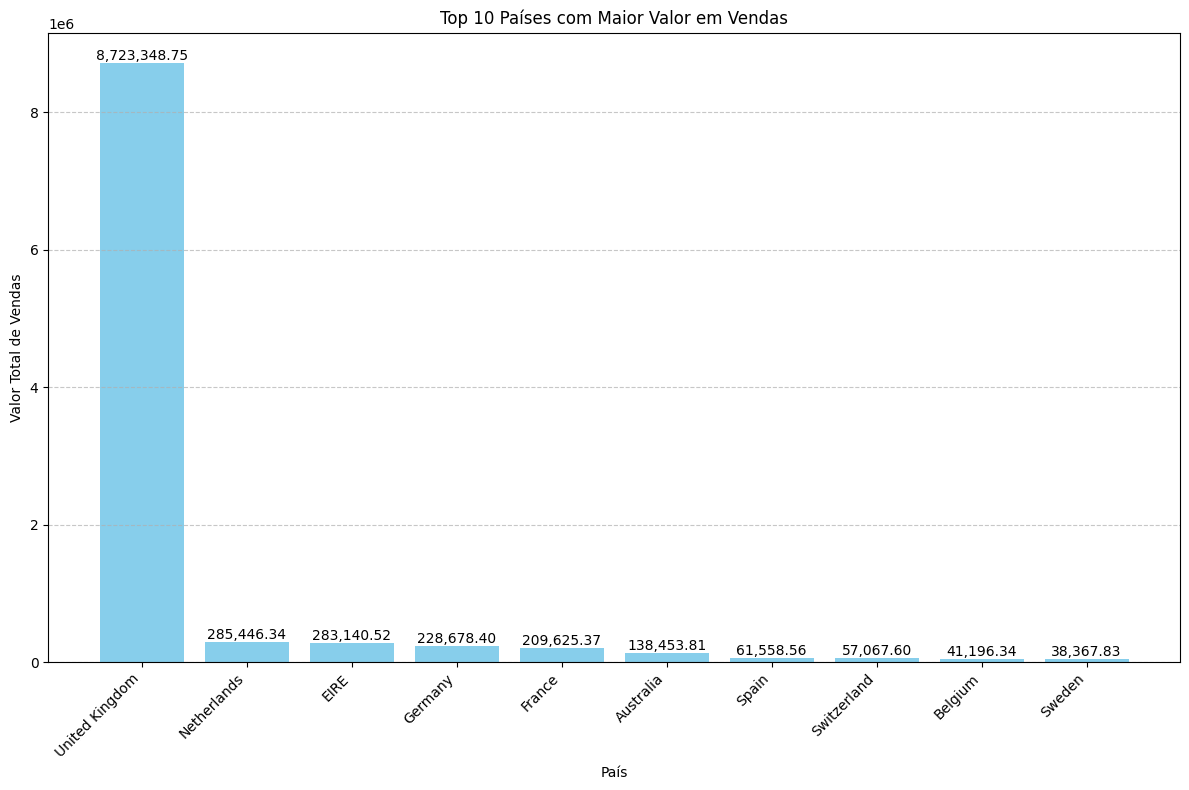

In [61]:
plt.figure(figsize=(12, 8))
bars = plt.bar(top_10_countries['Country'], top_10_countries['TotalPrice'], color='skyblue')
plt.title('Top 10 Países com Maior Valor em Vendas')
plt.xlabel('País')
plt.ylabel('Valor Total de Vendas')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.xticks(range(len(top_10_countries)), top_10_countries['Country'])

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:,.2f}', ha='center', va='bottom', fontsize=10)

In [62]:
sales_by_product = df_sem_outliers.groupby('Description')['Quantity'].sum().reset_index()

sales_by_product = sales_by_product.sort_values(by='Quantity', ascending=False)

top_10_products = sales_by_product.head(10)

print(top_10_products)

                             Description  Quantity
3921   WORLD WAR 2 GLIDERS ASSTD DESIGNS     54951
1804             JUMBO BAG RED RETROSPOT     48371
3831  WHITE HANGING HEART T-LIGHT HOLDER     37872
2667                      POPCORN HOLDER     36749
2327     PACK OF 72 RETROSPOT CAKE CASES     36396
217        ASSORTED COLOUR BIRD ORNAMENT     36362
2727                  RABBIT NIGHT LIGHT     30739
2095              MINI PAINT SET VINTAGE     26633
2293           PACK OF 12 LONDON TISSUES     26119
2325  PACK OF 60 PINK PAISLEY CAKE CASES     24820


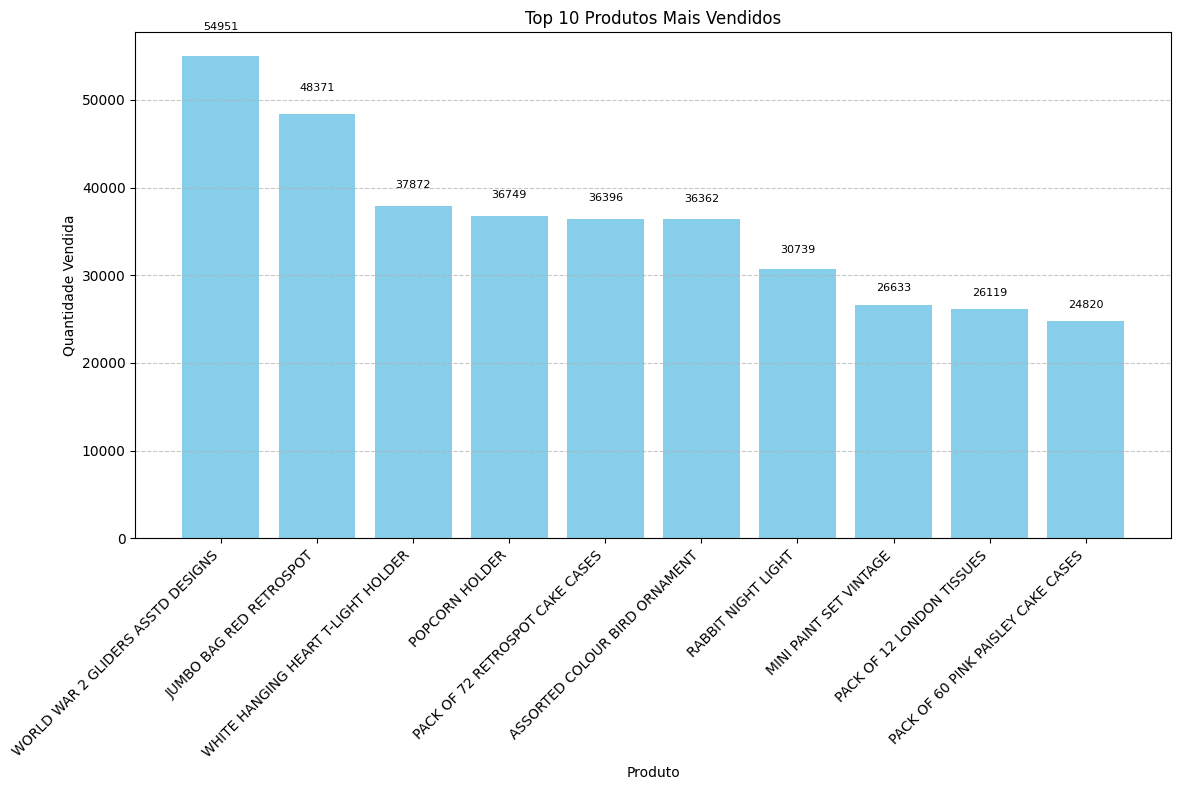

In [66]:
plt.figure(figsize=(12, 8))  # Ajuste o tamanho da figura para dar mais espaço
bars = plt.bar(top_10_products['Description'], top_10_products['Quantity'], color='skyblue')
plt.title('Top 10 Produtos Mais Vendidos')
plt.xlabel('Produto')
plt.ylabel('Quantidade Vendida')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Adicionar os rótulos de dados
for bar, qty in zip(bars, top_10_products['Quantity']):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.05 * yval, f'{qty}', ha='center', va='bottom', fontsize=8)

plt.show()


In [67]:
sales_by_month = df_sem_outliers.groupby('YearMonth')['TotalPrice'].sum().reset_index()

sales_by_month = sales_by_month.sort_values(by='TotalPrice', ascending=False)

print(sales_by_month)

   YearMonth  TotalPrice
11   2011-11  1503866.78
10   2011-10  1151263.73
9    2011-09  1056437.19
0    2010-12   807911.40
5    2011-05   761153.86
6    2011-06   760547.01
8    2011-08   746779.32
7    2011-07   718077.12
3    2011-03   716215.26
1    2011-01   612628.01
4    2011-04   536969.49
2    2011-02   522545.56
12   2011-12   469320.73


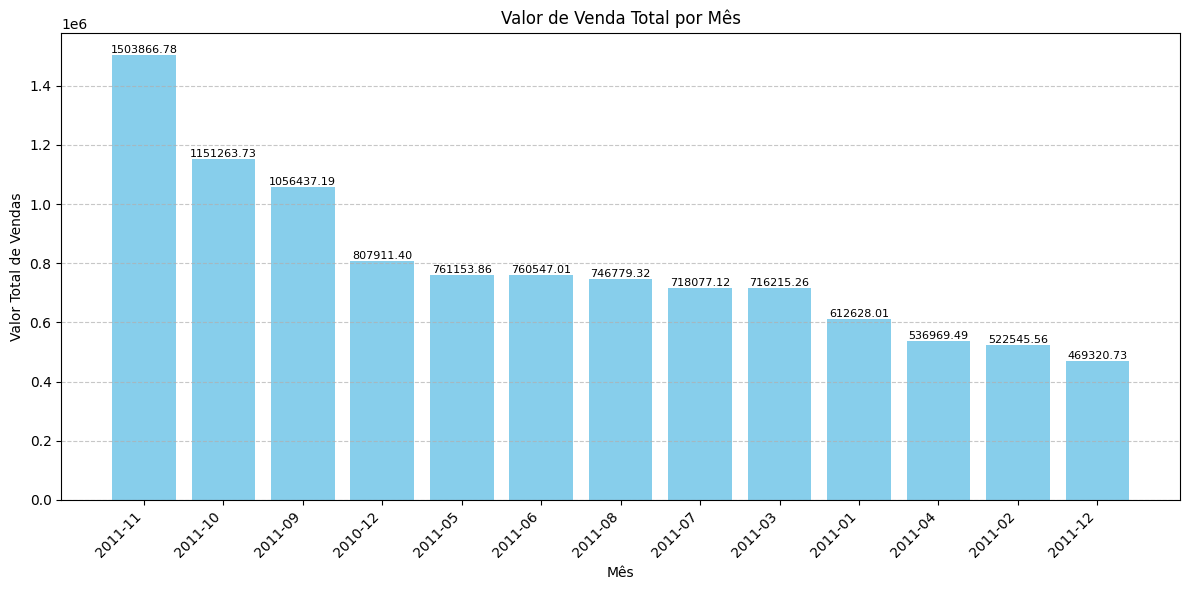

In [68]:
plt.figure(figsize=(12, 6))
bars = plt.bar(sales_by_month['YearMonth'].astype(str), sales_by_month['TotalPrice'], color='skyblue')
plt.title('Valor de Venda Total por Mês')
plt.xlabel('Mês')
plt.ylabel('Valor Total de Vendas')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Adicionar rótulos de dados (valores) acima das barras
for bar, total_price in zip(bars, sales_by_month['TotalPrice']):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{total_price:.2f}', ha='center', va='bottom', fontsize=8)

plt.show()

<ipython-input-70-6303fa9db474>:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_10_countries_by_month = sales_by_month_country.groupby('YearMonth').apply(lambda x: x.nlargest(10, 'TotalPrice')).reset_index(drop=True)


<Figure size 1200x800 with 0 Axes>

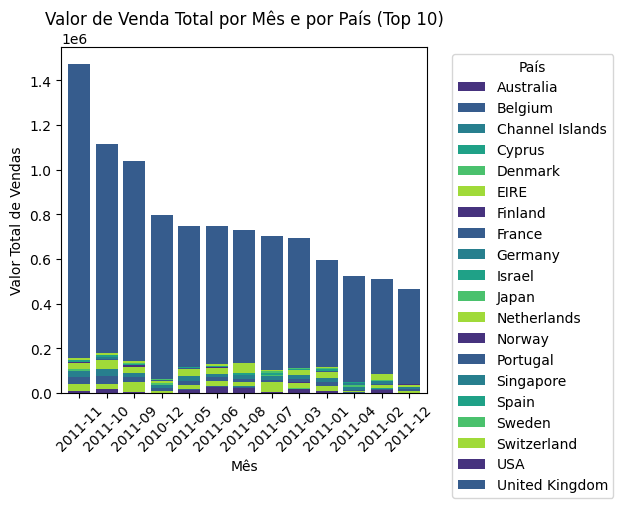

In [70]:
# Definir a lista de meses de interesse
meses_interesse = ['2011-11', '2011-10', '2011-09', '2010-12', '2011-05',
                   '2011-06', '2011-08', '2011-07', '2011-03', '2011-01',
                   '2011-04', '2011-02', '2011-12']

# Filtrar o dataframe original pelos meses de interesse
df_interesse = df_sem_outliers[df_sem_outliers['YearMonth'].astype(str).isin(meses_interesse)]

# Agrupar por mês e país, calcular o valor de venda total e selecionar os top 10 países
sales_by_month_country = df_interesse.groupby(['YearMonth', 'Country'])['TotalPrice'].sum().reset_index()
top_10_countries_by_month = sales_by_month_country.groupby('YearMonth').apply(lambda x: x.nlargest(10, 'TotalPrice')).reset_index(drop=True)

# Pivotar os dados para preparar para o gráfico de barras empilhadas
pivot_sales = top_10_countries_by_month.pivot(index='YearMonth', columns='Country', values='TotalPrice').fillna(0)

# Ordenar os meses pela ordem desejada
pivot_sales = pivot_sales.reindex(meses_interesse)

# Plotar o gráfico de barras empilhadas
plt.figure(figsize=(12, 8))
sns.set_palette('viridis')
pivot_sales.plot(kind='bar', stacked=True, width=0.8)

plt.title('Valor de Venda Total por Mês e por País (Top 10)')
plt.xlabel('Mês')
plt.ylabel('Valor Total de Vendas')
plt.xticks(rotation=45)
plt.legend(title='País', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

In [73]:
orders_by_customer_invoice = df_sem_outliers.groupby(['CustomerID', 'InvoiceNo']).agg({
    'InvoiceDate': 'max',
    'TotalPrice': 'sum'
}).reset_index()

print(orders_by_customer_invoice.head())

   CustomerID InvoiceNo         InvoiceDate  TotalPrice
0          -1    536544 2010-12-01 14:32:00     5521.14
1          -1    536555 2010-12-01 14:37:00        2.97
2          -1    536558 2010-12-01 14:48:00       99.75
3          -1    536565 2010-12-01 15:15:00        6.70
4          -1    536592 2010-12-01 17:06:00     6915.65


In [79]:
max_date = df_sem_outliers['InvoiceDate'].max()


rfm = orders_by_customer_invoice.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (max_date - x.max()).days,
    'InvoiceNo': 'count',
    'TotalPrice': 'sum'
}).reset_index()

rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

print(rfm.head())

   CustomerID  Recency  Frequency    Monetary
0          -1        0       1426  1730298.52
1       12347        1          7     4310.00
2       12348       74          4     1797.24
3       12349       18          1     1757.55
4       12350      309          1      334.40
